In [1]:
import pandas as pd

In [2]:
data1 = 'data1.csv'
df1 = pd.read_csv(data1, low_memory=False)

df1 = df1.loc[~pd.isnull(df1['original_id']),:]

data2 = 'SnippetsAnswerPythonOnly.csv'
df2 = pd.read_csv(data2, warn_bad_lines=False, error_bad_lines=False)

# df1.set_index('Unnamed: 0', inplace=True)
df2.set_index('Id', inplace=True)

In [3]:
df1.head()

,id,original_id,post_id,pred_post_block_version_id,root_post_block_version_id,length,line_count,tags,content,last_process_sent_p2,last_process_sent_p3,python2_result,python3_result,execution_time_p2,execution_time_p3,status_code_p2,status_code_p3,last_update
0,722536,199071576,32712117,199071567.0,199071567,222,2,<python>,"needs = set(['version','importance','other...",2019-02-04 01:55:41.634686+00,2019-02-04 01:15:41.306637+00,"File ""py2_722536.py"", line 1\n needs = se...","File ""py3_722536.py"", line 1\n needs = se...",0.050118,0.078063,35.0,35.0,2019-02-04 01:55:41.6348+00
1,722260,198602419,32673637,NaN,198602419,362,19,<python>,"l = list()\n for key, val in data.items...",2019-02-04 01:15:34.830634+00,2019-02-04 02:40:50.908227+00,"File ""py2_722260.py"", line 9\n 1 1\n ...","File ""py3_722260.py"", line 5\n print l\n ...",0.079065,0.150514,35.0,35.0,2019-02-04 02:40:50.90833+00
2,722074,198090021,32632097,198090014.0,198089977,50,2,<python>,">>> '%s/%s/%s' % (month, day, year)\n 1...",2019-02-04 01:15:34.512219+00,2019-02-04 01:15:33.331429+00,"Traceback (most recent call last):\n File ""py...","File ""py3_722074.py"", line 2\n 1/2/03\n ...",0.024348,0.175524,30.0,35.0,2019-02-04 01:15:34.512322+00
3,619753,163164691,12236048,163164687.0,163164687,141,6,<python>,">>> def foo(arg1, arg2):\n ... prin...",2019-02-04 02:20:52.87987+00,2019-02-04 02:28:14.470611+00,"File ""py2_619753.py"", line 2\n ... pr...","File ""py3_619753.py"", line 2\n ... pr...",0.046885,0.095249,36.0,36.0,2019-02-04 02:28:14.470716+00
4,722206,198480410,32663898,198480401.0,198480401,158,5,<python>,def evens(numbers):\n for i in rang...,2019-02-04 01:15:34.87272+00,2019-02-04 01:57:00.510284+00,NaN,NaN,0.052550,0.053653,0.0,0.0,2019-02-04 01:57:00.510375+00


In [4]:
df2.head()

,PostId,PredPostBlockVersionId,RootPostBlockVersionId,Length,LineCount,PostBlockTypeId,table4_Id,Tags,Score,ParentId,PostTypeId,Content
Id,,,,,,,,,,,,
106135976,1840,NaN,106135976,421,17,2,1840,<python>,9,1829,2,import sys\nimport select\nimport termios\nimp...
106135983,1840,106135976.0,106135976,421,17,2,1840,<python>,9,1829,2,import sys\nimport select\nimport termios\nimp...
106136093,1852,NaN,106136093,43,2,2,1852,<python>,9,1829,2,import msvcrt\n answer=msvcrt.getch()
106136097,1852,106136093.0,106136093,43,2,2,1852,<python>,9,1829,2,import msvcrt\n answer=msvcrt.getch()
106136247,1870,NaN,106136247,327,15,2,1870,<python>,4,1829,2,#!C:\\python25\\python.exe\n import msv...


In [10]:
res = df2.loc[df1['original_id'].apply(lambda x: int(x)),'Score']
res.index = df1.index
df1['score'] = res

In [14]:
idxs = ~pd.isnull(df1['status_code_p2']) & ~pd.isnull(df1['status_code_p3'])
df1 = df1.loc[idxs,:]

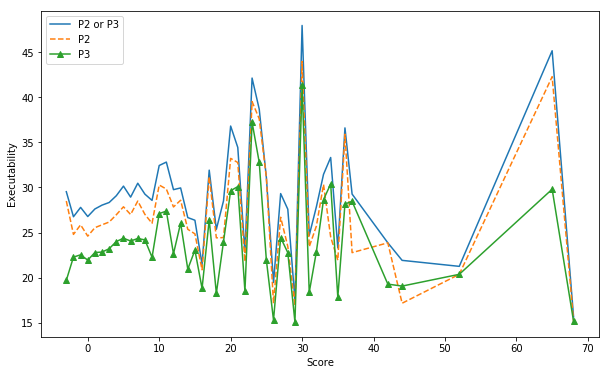

In [26]:
import matplotlib.pyplot as plt

%matplotlib inline

s2 = 'status_code_p2'
s3 = 'status_code_p3'
e = 'exec'
e2 = 'exec2'
e3 = 'exec3'

df = df1
df[e2] = (df.loc[:,s2] == 0)
df[e3] = (df.loc[:,s3] == 0)
df[e] =  df[e2] | df[e3]

line_vals = df1['score'].value_counts()
line_vals = line_vals[line_vals > 100]
line_vals = line_vals.index
line_vals = line_vals.sort_values()
ex2s = []
ex3s = []
exs = []
for line_val in line_vals:
    idxs = df1['score'] == line_val
    dfs = df1.loc[idxs,:]
    
    ex2 = sum(dfs.loc[:,e2]) / dfs.shape[0] * 100
    ex3 = sum(dfs.loc[:,e3]) / dfs.shape[0] * 100
    ex = sum(dfs.loc[:,e]) / dfs.shape[0] * 100
    
    exs.append(ex)
    ex2s.append(ex2)
    ex3s.append(ex3)
    
plt.figure(figsize=(10,6))
plt.plot(line_vals, exs, '-', label='P2 or P3')
plt.plot(line_vals, ex2s, '--', label='P2')
plt.plot(line_vals, ex3s, '-^', label='P3')
plt.xlabel('Score')
plt.ylabel('Executability')
plt.legend()